# Stock Market Analysis 

The focus of this project is to understand and interpret the technology stocks trend. I intend to analyze the risk of a stock and predict future stock prices based on its previous performance. 

I would analyze for the following questions:
1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks closing prices?
4.) What was the correlation between different stocks daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?
    

In [1]:
#Let's start with some basic imports 
import numpy as np 
import pandas as pd 
from pandas import DataFrame, Series 

In [2]:
#Imports for plotting 
import matplotlib as mlp 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
#Imports for readig stock from web 
from pandas_datareader import DataReader

#For timeStamps 
from datetime import datetime

#For division
from __future__ import division

I will use Yahoo finance and pandas to gather information about technology stocks. 

In [4]:
#Creating a list of technology stocks: tickers. 
techno_list =['AAPL','GOOG','MSFT','AMZN']

#Setting start and end date 
end = datetime.now()

start = datetime(end.year -1, end.month, end.day)


In [5]:
#Loop to collect data from yahoo and getting in a data frame 
 
for i in techno_list:
    globals()[i] = DataReader(i, 'morningstar', start, end)


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 260 entries, (AAPL, 2017-05-01 00:00:00) to (AAPL, 2018-04-27 00:00:00)
Data columns (total 5 columns):
Close     260 non-null float64
High      260 non-null float64
Low       260 non-null float64
Open      260 non-null float64
Volume    260 non-null int64
dtypes: float64(4), int64(1)
memory usage: 13.0+ KB


In [7]:
#Since its multiIndexed, lets drop the symbol level 
AAPL.index = AAPL.index.droplevel(0)


In [8]:
AAPL.describe()

,Close,High,Low,Open,Volume
count,260.000000,260.000000,260.000000,260.000000,2.600000e+02
mean,162.730308,163.982473,161.468404,162.752500,2.947345e+07
std,10.564588,10.679758,10.572425,10.580889,1.328936e+07
min,142.270000,143.500000,142.200000,142.900000,0.000000e+00
25%,153.980000,154.839725,153.310000,154.000000,2.149695e+07
50%,162.515000,163.890000,160.255000,162.615000,2.670501e+07
75%,172.455000,174.030000,171.560000,172.532500,3.529748e+07
max,181.720000,183.500000,180.210000,182.590000,8.659382e+07


In [9]:
AAPL.head()

,Close,High,Low,Open,Volume
Date,,,,,
2017-05-01,146.58,147.20,144.96,145.10,33602943
2017-05-02,147.51,148.09,146.84,147.54,45352194
2017-05-03,147.06,147.49,144.27,145.59,45697034
2017-05-04,146.53,147.14,145.81,146.52,23371872
2017-05-05,148.96,148.98,146.76,146.76,27327725


Now let us try to understand the trend (past data) of the closing pricings and volume of the stocks.

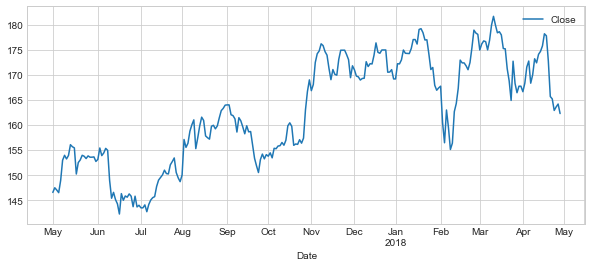

In [10]:
AAPL['Close'].plot(legend= True, figsize= (10,4))

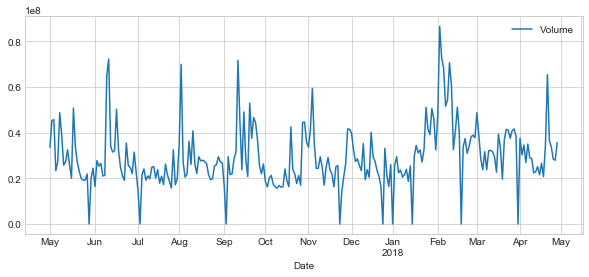

In [11]:
AAPL['Volume'].plot(legend = True, figsize = (10,4))

Let us now calculate the moving average for the stock. 

In [12]:
ma_day = [10, 20,50]
for ma in ma_day:
    column_name = "MA for %s days"%(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Close'], ma)

C:\Users\Anusha Munnolli\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
C:\Users\Anusha Munnolli\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
C:\Users\Anusha Munnolli\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """


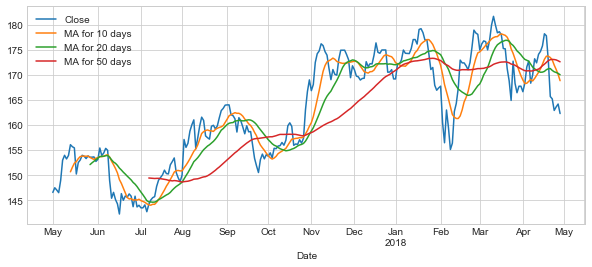

In [13]:
AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10,4))

Now let us calculate and plot daily returns of the Apple stock. 

In [14]:
AAPL['Daily Returns'] = AAPL['Close'].pct_change()

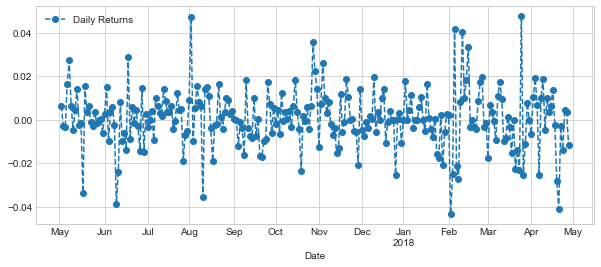

In [15]:
AAPL['Daily Returns'].plot(figsize = (10,4),  legend = True, linestyle ="--", marker ='o')

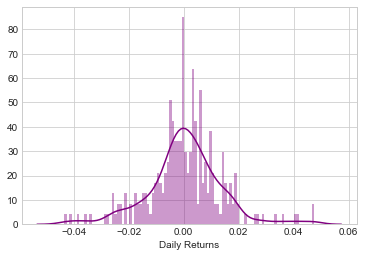

In [16]:
#Let us understand the average daily returns of the apple stock.
sns.distplot(AAPL['Daily Returns'].dropna(), bins =100, color ='purple')

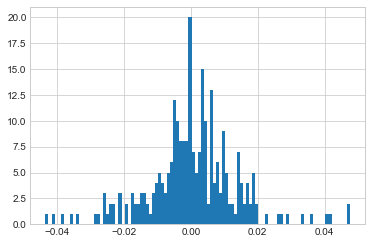

In [17]:
#Alternatively
AAPL['Daily Returns'].hist( bins =100)

In [18]:
closing_df = DataReader(techno_list, 'morningstar', start, end)['Close']

In [19]:
closing_df.head()

Symbol  Date      
AAPL    2017-05-01    146.58
        2017-05-02    147.51
        2017-05-03    147.06
        2017-05-04    146.53
        2017-05-05    148.96
Name: Close, dtype: float64

In [20]:
# Rearranging the series into a matrix 
closing_df = pd.concat([closing_df.AAPL, closing_df.AMZN, closing_df.MSFT, closing_df.GOOG], axis =1)

In [21]:
closing_df.columns = techno_list

In [22]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-05-01,146.58,948.23,69.41,912.57
2017-05-02,147.51,946.94,69.30,916.44
2017-05-03,147.06,941.03,69.08,927.04
2017-05-04,146.53,937.53,68.81,931.66
2017-05-05,148.96,934.15,69.00,927.13


Let us now understand the correlation between different stock prices.

In [23]:
tech_returns = closing_df.pct_change()

In [24]:
tech_returns.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-05-01,NaN,NaN,NaN,NaN
2017-05-02,0.006345,-0.001360,-0.001585,0.004241
2017-05-03,-0.003051,-0.006241,-0.003175,0.011566
2017-05-04,-0.003604,-0.003719,-0.003909,0.004984
2017-05-05,0.016584,-0.003605,0.002761,-0.004862


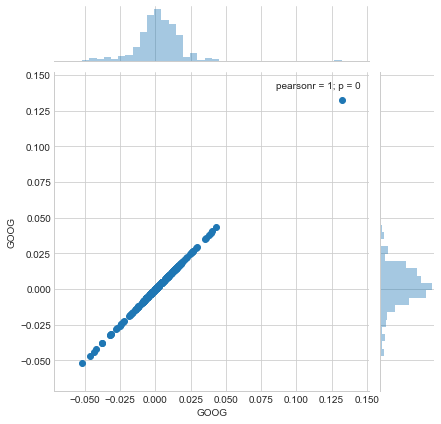

In [25]:
sns.jointplot('GOOG', 'GOOG', tech_returns, kind = 'scatter')

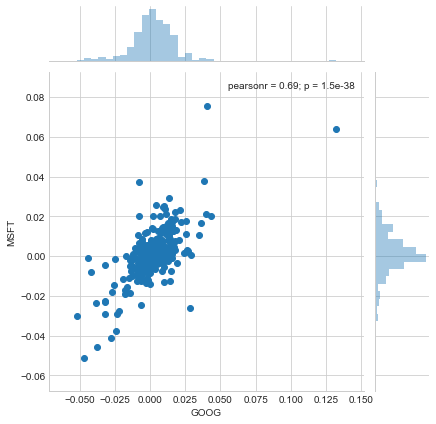

In [26]:
sns.jointplot('GOOG', 'MSFT', tech_returns, kind = 'scatter')

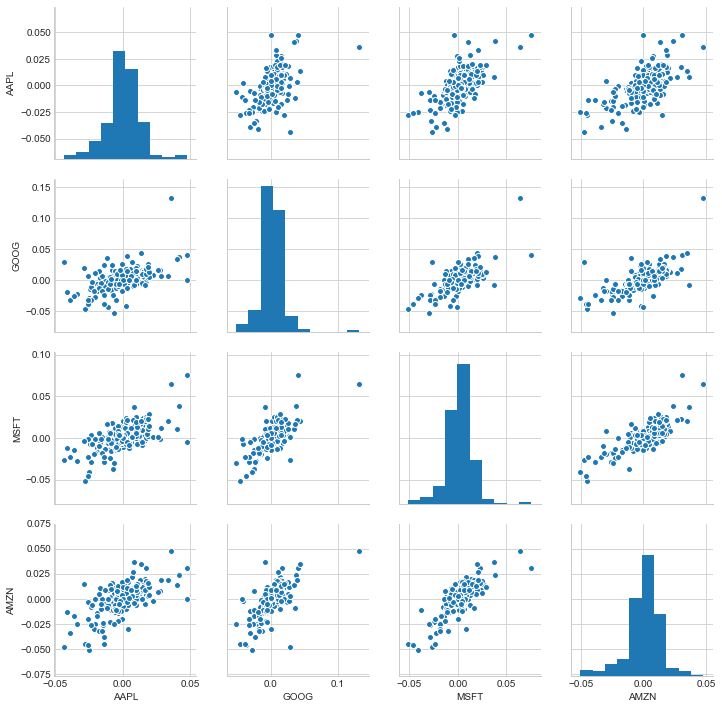

In [27]:
#To understand the correlation between stocks returns of different technology stocks, let us try the comparison plots. 
sns.pairplot(tech_returns.dropna())

C:\Users\Anusha Munnolli\Anaconda2\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


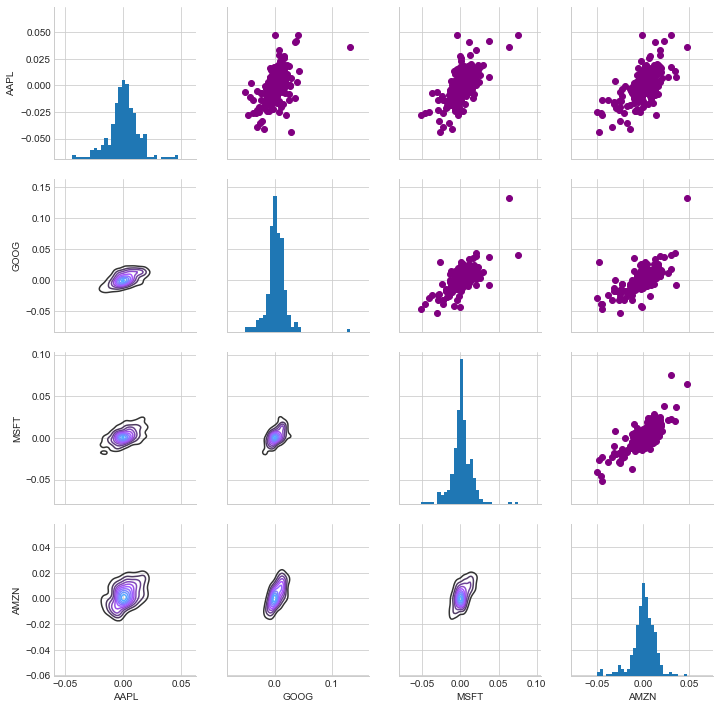

In [28]:
#Another kind of comparison plots with more flexibility on the kind of plots. 
returns_fig = sns.PairGrid(tech_returns.dropna())
returns_fig.map_upper(plt.scatter , color ='purple')
returns_fig.map_lower(sns.kdeplot , cmap = 'cool_d')
returns_fig.map_diag(plt.hist , bins = 30)

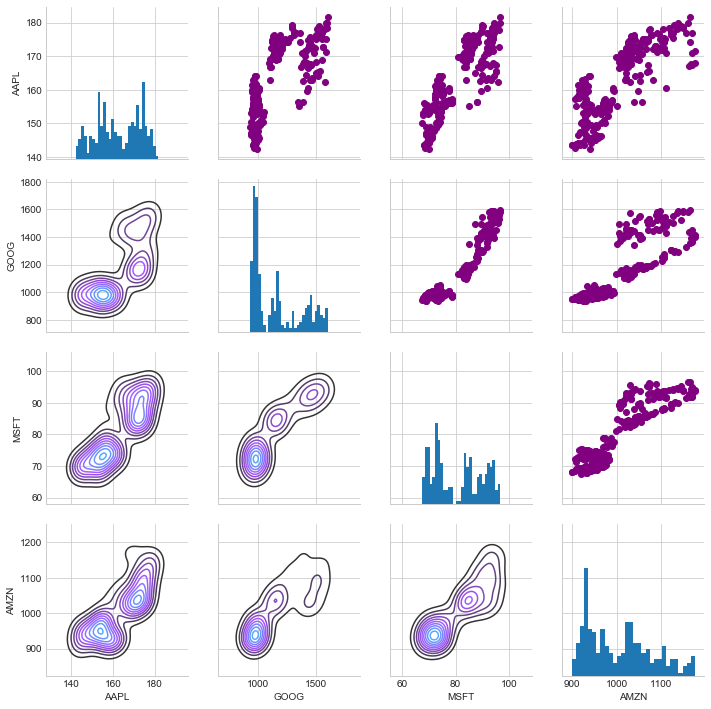

In [29]:
# Let us understand the correlation between these technology stocks.
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter , color ='purple')
returns_fig.map_lower(sns.kdeplot , cmap = 'cool_d')
returns_fig.map_diag(plt.hist , bins = 30)

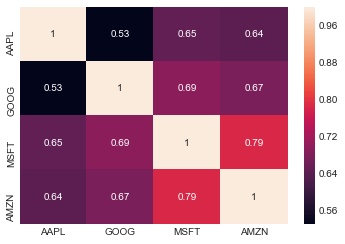

In [30]:
# Let us look at the correlation values for closing stock prices and stock returns. 

sns.heatmap(tech_returns.dropna().corr(), annot = True)


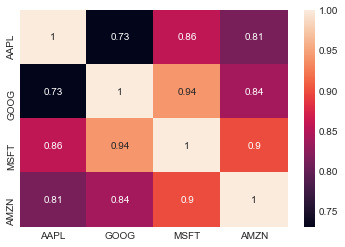

In [31]:
sns.heatmap(closing_df.corr(), annot = True)

From the above analysis, we can understand that stock reurns of Microsoft and Amazon are highly correlated and stock prices of Microsoft and Google are highly correlated.

Let us understand the risk factor in investing these technology stocks.

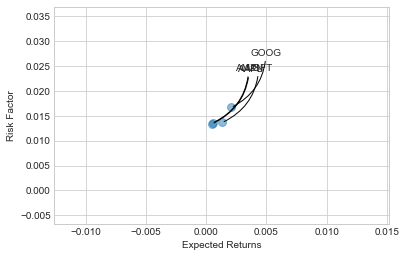

In [32]:
rets = tech_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean() , rets.std(),alpha=0.5, s = area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk Factor')

for i, x, y in zip(rets.columns, rets.mean() , rets.std()):
    
    plt.annotate(
        i, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))




From the above graph, we can say that there is very little difference in risk factor for investments in different technology stocks.

Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Let us now calculate value at risk. 

The first approach, in calculating this value, is the bootstrap method. 


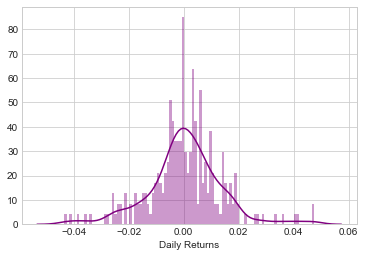

In [36]:
#Let us first construct the histogram 
sns.distplot(AAPL['Daily Returns'].dropna(), color= 'purple', bins = 100)

Further, I have used quantiles to get the risk value for the stock.

In [37]:
rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-05-02,0.006345,-0.001360,-0.001585,0.004241
2017-05-03,-0.003051,-0.006241,-0.003175,0.011566
2017-05-04,-0.003604,-0.003719,-0.003909,0.004984
2017-05-05,0.016584,-0.003605,0.002761,-0.004862
2017-05-08,0.027189,0.015940,-0.000870,0.007734


In [38]:
rets.AAPL.quantile(0.05)

-0.023207032194723774

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 2.32%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.0232 * 1,000,000 = $23,200.

Let us explore the monte carlo method to calculate the risk value. 



Value at Risk using the Monte Carlo method






Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:






We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.






The equation for geometric Browninan motion is given by the following equation:


ΔSS=μΔt+σϵΔt−−−√
ΔSS=μΔt+σϵΔt






Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.







ΔS=S(μΔt+σϵΔt−−−√)
ΔS=S(μΔt+σϵΔt)






Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

Source: Udemy learning program 

Below is the demonstration for Google stocks. Let us define the variables needed for monte carlo execution. 

In [43]:
#Time horizon 
days = 365

#Delta value 
dt = 1/days 

#Mean value for Google stocks 
mu = rets.mean()['GOOG']

#Volatility of the stock define by the standard deviation 
sigma = rets.std()['GOOG']

Let us create the function that takes in starting price, days, mu, and sigma. 

In [44]:
def stock_monte_carlo (starting_price, days, mu, sigma):
    
    #price array 
    price = np.zeros(days)
    price[0] = starting_price
    
    #Shock and drift 
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price for the number of days
    for x in xrange(1, days):
        
        shock[x] = np.random.normal(loc= (mu*dt), scale= sigma*dt)
        drift[x] = mu * dt 
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
        
    return price

        
    

In [45]:
#quick look at the google stocks 
GOOG.head()

Close    High       Low    Open   Volume
Symbol Date                                                 
GOOG   2017-05-01  912.57  915.68  901.4500  901.94  2115993
       2017-05-02  916.44  920.77  909.4526  909.62  1587219
       2017-05-03  927.04  928.10  912.5426  914.86  1499532
       2017-05-04  931.66  935.93  924.5900  926.07  1422144
       2017-05-05  927.13  934.90  925.2000  933.54  1911275

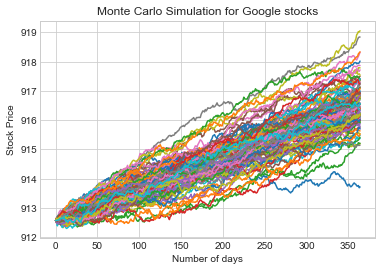

In [48]:
#Let us now apply the monte carlo function 
starting_price = 912.57

for run in xrange(100):
    plt.plot(stock_monte_carlo(starting_price, days, mu, sigma))
    plt.xlabel('Number of days')
    plt.ylabel('Stock Price')
    plt.title('Monte Carlo Simulation for Google stocks')

Let us now consider a histogram of the end results for larger number of runs.

In [51]:
runs =1000

#Creating an empty matrix to hold the end prices for these runs 

simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(starting_price, days, mu, sigma)[days-1]

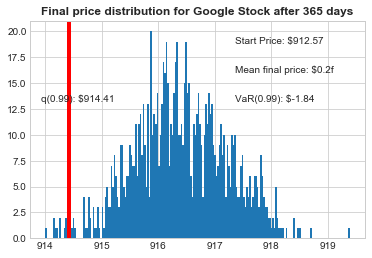

In [57]:
#Plotiing the histogram

plt.hist(simulations, bins = 200)

#Starting price text on the graph
plt.figtext(0.6,0.8, s= "Start Price: $%.2f"%starting_price)

#mean ending price text on the graph
plt.figtext(0.6, 0.7, s= "Mean final price: $0.2f"%simulations.mean())


# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q= np.percentile(simulations,1)

#Variance of the price ( within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (starting_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');